<center><strong><h1>UAS</h1></strong></center>
<p style="margin-left:33.3333%;font-size:20px;font-weight:600;color:blue;">PENGANTAR DATA MINING</p>
<p style="margin-left:30%;font-size:20px;font-weight:600;">Maftuh Mashuri (11160940000076)</p>

In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import TweetTokenizer as tw_tokenizer
%matplotlib inline

# BUTIR 1

In [92]:
dataset = pd.read_csv('data/datauas.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

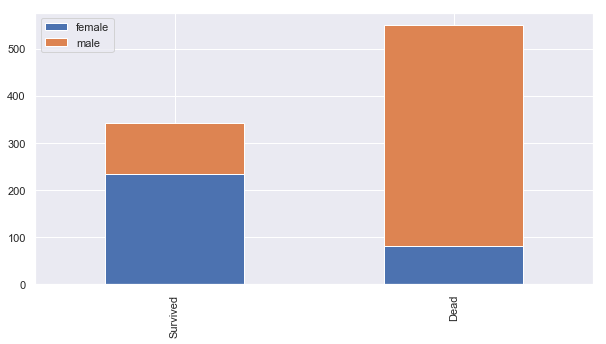

In [88]:
bar_chart('Sex')

Grafik diatas menginformasikan bahwa yang paling banyak hidup adalah **wanita** dari pada **pria**

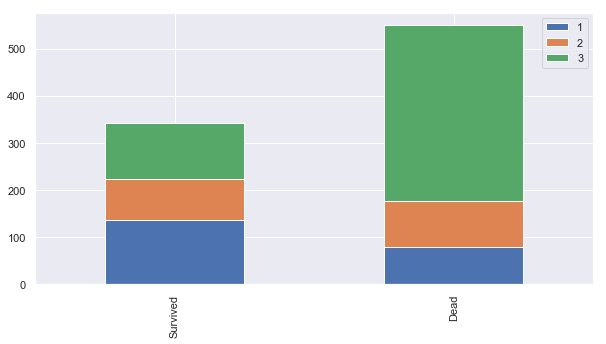

In [89]:
bar_chart('Pclass')

Grafik diatas menginformasikan bahwa **kelas 1** lebih banyak yang hidup dari pada kelas lainnya dan **kelas 3** lebih banyak yang meninggal dari pada kelas lainnya

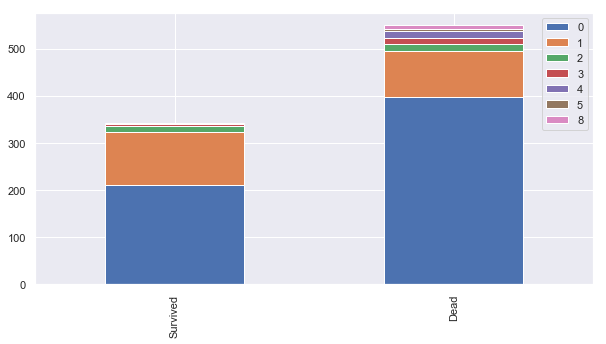

In [90]:
bar_chart('SibSp')

Grafik diatas menginformasikan bahwa **orang yang membawa lebih dari 2 orang kerabat** lebih banyak yang hidup dari pada **orang yang hanya sendiri**

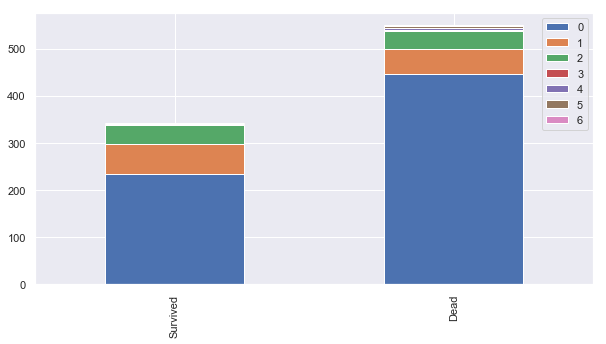

In [93]:
bar_chart('Parch')

Grafik diatas menginformasikan bahwa **orang yang membawa lebih dari 2 keluarga(orang tua, anak)** lebih banyak yang hidup dari pada **orang yang hanya sendiri**

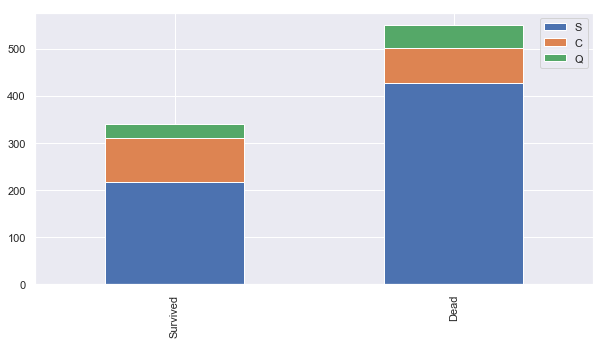

In [11]:
bar_chart('Embarked')

Grafi diatas menginformasikan bahwa **seseorang yang naik dari Cherbourg** lebih mungkin selamat dari pada yang naik dari Queenstown dan Southampton 

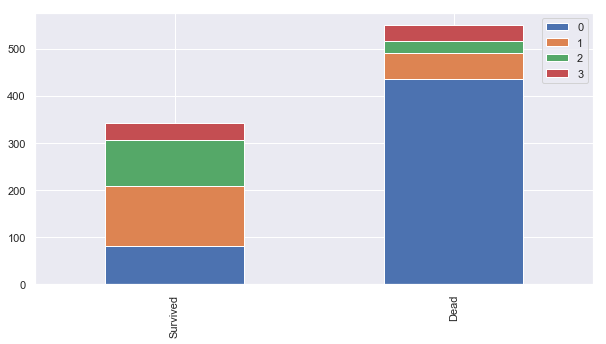

In [19]:
bar_chart('Title')

Grafi diatas menginformasikan bahwa **seseorang yang naik dari Cherbourg** lebih mungkin selamat dari pada yang naik dari Queenstown dan Southampton

In [94]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [95]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
dataset['Title'] = dataset['Title'].map(title_mapping)

In [96]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
# delete unnecessary feature from dataset
dataset.drop('Name', axis=1, inplace=True)

In [22]:
sex_mapping = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

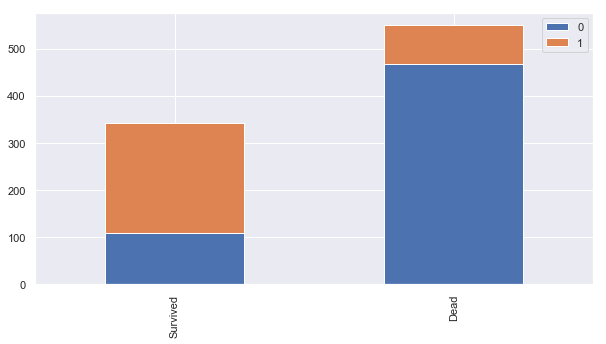

In [23]:
bar_chart('Sex')

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [98]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Mengisi missing values kelas

In [99]:
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)


In [108]:
dataset.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

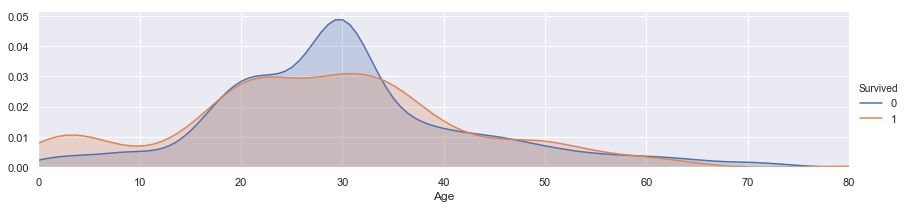

In [101]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

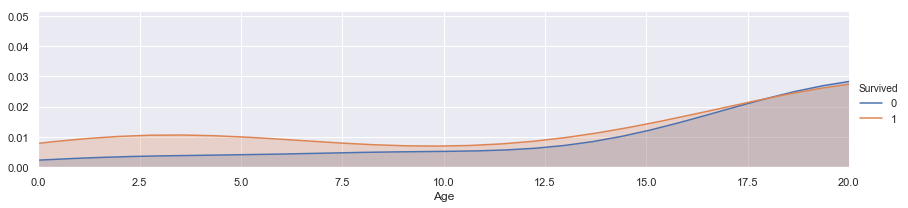

In [102]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

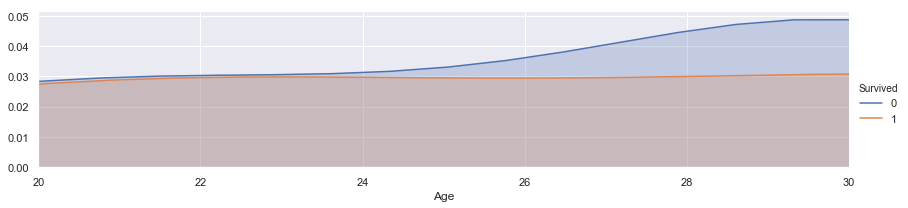

In [103]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

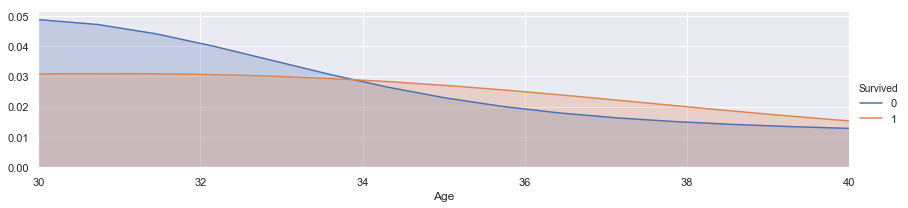

In [104]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

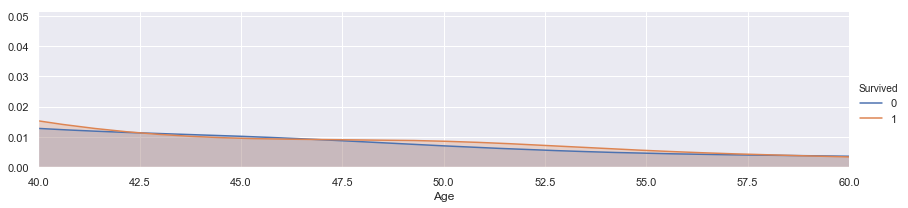

In [105]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40, 60)

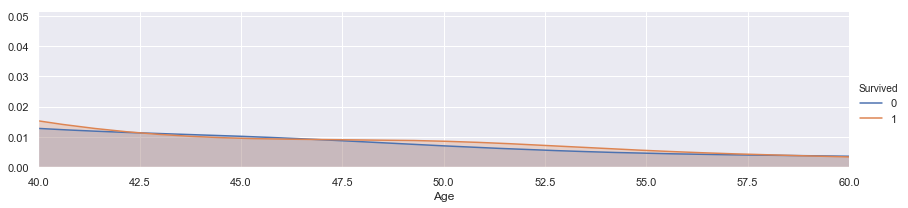

In [106]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80.0)

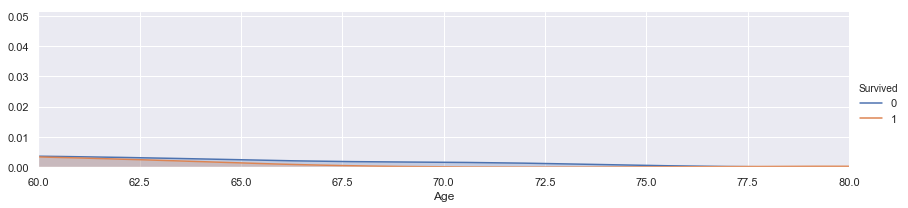

In [107]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [35]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


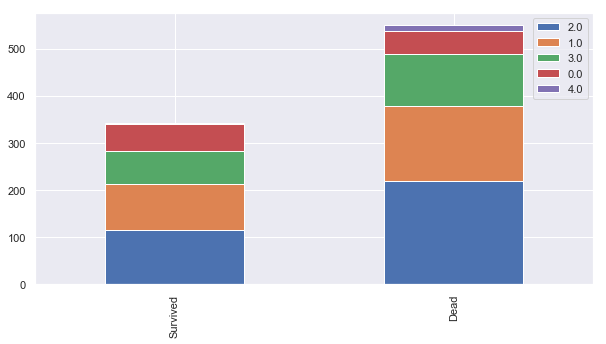

In [37]:
bar_chart('Age')

# Mengisi missing values kelas

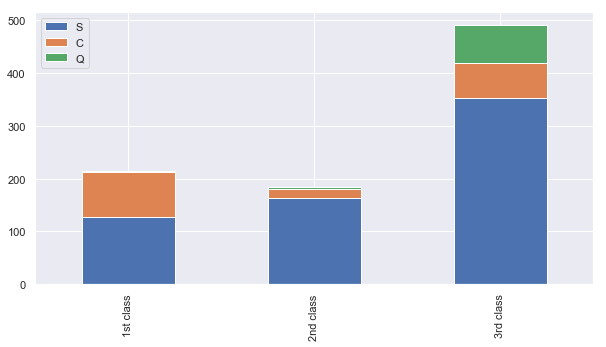

In [38]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [39]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [40]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [41]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

In [44]:
# fill missing Fare with median fare for each Pclass
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


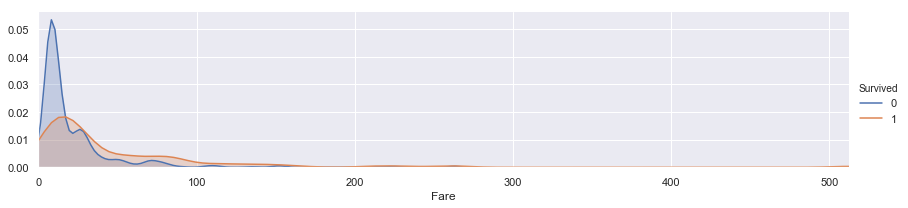

In [45]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0, 20)

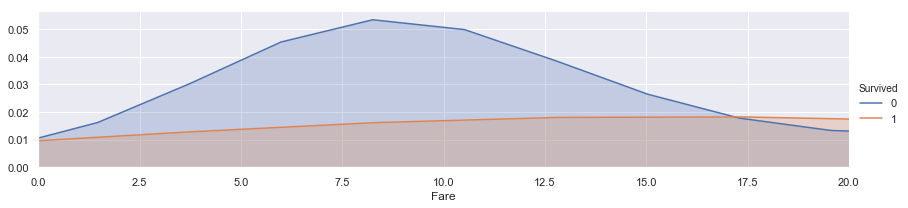

In [46]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

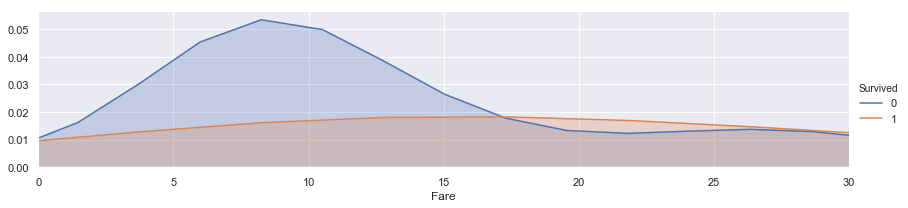

In [47]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

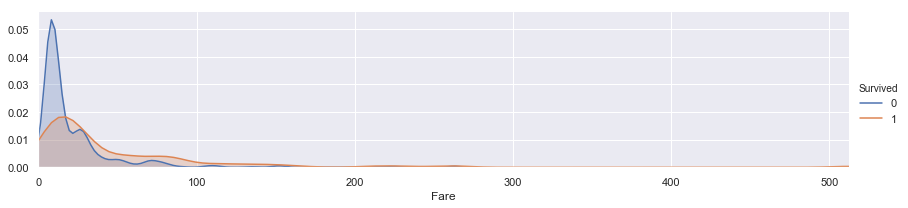

In [48]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [49]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [50]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 4.7 Cabin

In [51]:
dataset.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
E101               3
C22 C26            3
F2                 3
D                  3
B57 B59 B63 B66    2
B77                2
B58 B60            2
C125               2
E44                2
E33                2
D35                2
C65                2
D33                2
C2                 2
E121               2
C124               2
B5                 2
C83                2
B28                2
B18                2
E24                2
B35                2
C93                2
C78                2
B22                2
B20                2
                  ..
E40                1
D37                1
B41                1
C111               1
B50                1
C47                1
D10 D12            1
F G63              1
B79                1
A32                1
E38                1
E49                1
C70                1
D50                1
C7                 1
A7                 1
D56          

In [52]:
dataset['Cabin'] = dataset['Cabin'].str[:1]

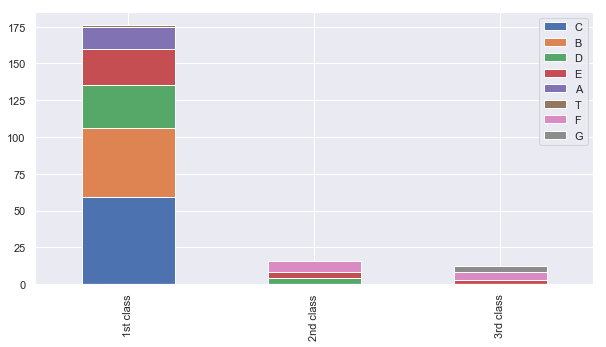

In [53]:
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [54]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [55]:
# fill missing Fare with median fare for each Pclass
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


# FamilySize

In [57]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


(0, 11.0)

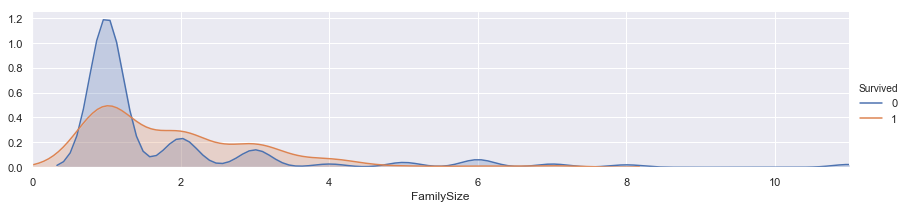

In [58]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [59]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [60]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [61]:
features_drop = ['Ticket', 'SibSp', 'Parch']
dataset = dataset.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [68]:
data_clean = np.array(dataset.drop(['Survived'], 1).astype(float))
target = np.array(dataset['Survived'])

data_clean.shape, target.shape

((891, 9), (891,))

In [70]:
data_clean

array([[1.00e+00, 3.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 4.00e-01],
       [2.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 2.00e+00, 4.00e-01],
       [3.00e+00, 3.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [8.89e+02, 3.00e+00, 1.00e+00, ..., 0.00e+00, 1.00e+00, 1.20e+00],
       [8.90e+02, 1.00e+00, 0.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [8.91e+02, 3.00e+00, 0.00e+00, ..., 2.00e+00, 0.00e+00, 0.00e+00]])

## 5. Modelling

In [64]:
# Importing Classifier Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [71]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(data_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
correct = 0
for i in range(len(data_clean)):
    predict_me = np.array(data_clean[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == target[i]:
        correct += 1

print(correct/len(data_clean))

0.5084175084175084


In [74]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(data_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
correct = 0
for i in range(len(data_clean)):
    predict_me = np.array(data_clean[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == target[i]:
        correct += 1

print(correct/len(data_clean))

0.5084175084175084


In [77]:
scaler = MinMaxScaler()
data_clean_scaled = scaler.fit_transform(data_clean)

In [78]:
kmeans.fit(data_clean_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
correct = 0
for i in range(len(data_clean)):
    predict_me = np.array(data_clean[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == target[i]:
        correct += 1

print(correct/len(data_clean))

0.622895622895623


# BUTIR 2

In [109]:
data = pd.read_csv("data/export_dataframe.csv",error_bad_lines=False,usecols =["text"])
data[data['text'].duplicated(keep=False)].sort_values('text').head(8)
data.head()

,text
0,@agnesberti01 itu kata jata kiasan anak jaman ...
1,@sadbness Klo bulanan kan happy menstruasi
2,"Jalan ke warteg aja mas deket, dah gt murah, k..."
3,Siapin lilin dulu dah
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT


In [110]:
stopword_file1 = open('stopword/stopword_id.txt', "r").read() # Membuka file stopword bahasa indonesia dan menjadikan isi file tersebut sebagai string
stopword_file2 = open('stopword_en/stopwords_en.txt', "r").read()  # Membuka file stopword bahasa inggris dan menjadikan isi file tersebut sebagai string
stopword_file3 = open('stopword_noise/stopword_noise.txt', "r").read()  # Membuka file stopword noise dan menjadikan isi file tersebut sebagai string
stopword_file_all = stopword_file1 + stopword_file2 + stopword_file3  # Menggabungkan ketiga string stopword sebelumnya kedalam satu string
stopwords = stopword_file_all.split('\n') # Memisahkan kata dalam string yang sudah digambungkan berdasarkan baris
# print(stopwords)

In [111]:
slangwords = dict() # Membuat dictionary kosong untuk menyimpan kata slang dan formal sebagai key dan value
slangwords_dataframe = pd.read_csv('slangword/colloquial-indonesian-lexicon.csv') # Membuka file csv yang berisi kata slang dan formal dan mengkonversi kedalam dataframe
for slang, formal in zip(slangwords_dataframe['slang'], slangwords_dataframe['formal']):
    slangwords[slang] = formal # Mapping kata slang dan formal dan memasukkan ke dalam dictionary secara berulang

slangword_file = open('slangword/slangword.txt', "r").read() # Membuka file yang berisi kata slang dan kata formal dan mengkonversi kedalam string
slangwords_text = slangword_file.split('\n') # Memisahkan kata berdasarkan baris namun kata slang dan kata formal masih belum terpisah. output : (['slang:formal', ...])
#print(slangwords_text)
for slang in slangwords_text:
    split_slang = slang.split(":") # Memisahkan semua kata slang dan kata formal berdasarkan "titik dua (:)"
    slangwords[split_slang[0]] = split_slang[1] # Mapping semua kata slang dan kata formal ke dalam dictionary. Output : {'slang' : 'formal', ...}
#print(slangwords)

In [112]:
data['tokenized'] = list(map(lambda tweet: tw_tokenizer(strip_handles=True, reduce_len=True).tokenize(tweet.lower()), data['text'])) # Memisahkan kata dalam text berasarkan "spasi"
data['clean_text'] = list(map(lambda tweet: [w for w in tweet if w.isalnum()], data['tokenized'])) # Filtering kata yang hanya berisi karakater a-z dan 0-9 (Menghapus url, hashtag, mention)
data.head(10)

,text,tokenized,clean_text
0,@agnesberti01 itu kata jata kiasan anak jaman ...,"[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, jaman, 2012]"
1,@sadbness Klo bulanan kan happy menstruasi,"[klo, bulanan, kan, happy, menstruasi]","[klo, bulanan, kan, happy, menstruasi]"
2,"Jalan ke warteg aja mas deket, dah gt murah, k...","[jalan, ke, warteg, aja, mas, deket, ,, dah, g...","[jalan, ke, warteg, aja, mas, deket, dah, gt, ..."
3,Siapin lilin dulu dah,"[siapin, lilin, dulu, dah]","[siapin, lilin, dulu, dah]"
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT,"[#debatcapresjict, #asingkuasaipelabuhanjict]",[]
5,"quote quote \n\n"" hasil tidak akan mengkhianat...","[quote, quote, "", hasil, tidak, akan, mengkhia...","[quote, quote, hasil, tidak, akan, mengkhianat..."
6,[23:56] #JAKARTA Tol Tomang - Karang Tengah - ...,"[[, 23:56, ], #jakarta, tol, tomang, -, karang...","[tol, tomang, karang, tengah, tangerang, bitung]"
7,[23:56] #JAKARTA Tol Cengkareng - Pluit - Toma...,"[[, 23:56, ], #jakarta, tol, cengkareng, -, pl...","[tol, cengkareng, pluit, tomang, cawang]"
8,[23:56] #JAKARTA Tol Cawang - Pancoran #LANCAR...,"[[, 23:56, ], #jakarta, tol, cawang, -, pancor...","[tol, cawang, pancoran]"
9,[23:56] #JAKARTA Buaran - Cipinang #LANCAR #Ja...,"[[, 23:56, ], #jakarta, buaran, -, cipinang, #...","[buaran, cipinang]"


In [113]:
data['handled_slangword'] = list(map(lambda tweet : list(map(lambda w : slangwords[w] if w in slangwords.keys() else w, tweet)), data['clean_text']))
# Mengubah kata slang menjadi kata formal (kata slang dan kata formal yang diperoleh dari dictionary) 
#print(handled_slangword[:100])
data.head(10)

,text,tokenized,clean_text,handled_slangword
0,@agnesberti01 itu kata jata kiasan anak jaman ...,"[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, zaman, 2012]"
1,@sadbness Klo bulanan kan happy menstruasi,"[klo, bulanan, kan, happy, menstruasi]","[klo, bulanan, kan, happy, menstruasi]","[kalau, bulanan, kan, happy, menstruasi]"
2,"Jalan ke warteg aja mas deket, dah gt murah, k...","[jalan, ke, warteg, aja, mas, deket, ,, dah, g...","[jalan, ke, warteg, aja, mas, deket, dah, gt, ...","[jalan, ke, warteg, saja, mas, dekat, deh, beg..."
3,Siapin lilin dulu dah,"[siapin, lilin, dulu, dah]","[siapin, lilin, dulu, dah]","[siapin, lilin, dahulu, deh]"
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT,"[#debatcapresjict, #asingkuasaipelabuhanjict]",[],[]
5,"quote quote \n\n"" hasil tidak akan mengkhianat...","[quote, quote, "", hasil, tidak, akan, mengkhia...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, tidak, akan, mengkhianat..."
6,[23:56] #JAKARTA Tol Tomang - Karang Tengah - ...,"[[, 23:56, ], #jakarta, tol, tomang, -, karang...","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tengah, tangerang, bitung]"
7,[23:56] #JAKARTA Tol Cengkareng - Pluit - Toma...,"[[, 23:56, ], #jakarta, tol, cengkareng, -, pl...","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]"
8,[23:56] #JAKARTA Tol Cawang - Pancoran #LANCAR...,"[[, 23:56, ], #jakarta, tol, cawang, -, pancor...","[tol, cawang, pancoran]","[tol, cawang, pancoran]"
9,[23:56] #JAKARTA Buaran - Cipinang #LANCAR #Ja...,"[[, 23:56, ], #jakarta, buaran, -, cipinang, #...","[buaran, cipinang]","[buaran, cipinang]"


In [114]:
data['removed_stopwords'] = list(map(lambda tweet : [w for w in tweet if w not in stopwords], data['handled_slangword']))
# Filtering data dengan menghapus kata yang tidak bermakna (Stopword yang diperoleh dari file)
data.head(10)

,text,tokenized,clean_text,handled_slangword,removed_stopwords
0,@agnesberti01 itu kata jata kiasan anak jaman ...,"[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, zaman, 2012]","[jata, kiasan, zaman, 2012]"
1,@sadbness Klo bulanan kan happy menstruasi,"[klo, bulanan, kan, happy, menstruasi]","[klo, bulanan, kan, happy, menstruasi]","[kalau, bulanan, kan, happy, menstruasi]","[bulanan, happy, menstruasi]"
2,"Jalan ke warteg aja mas deket, dah gt murah, k...","[jalan, ke, warteg, aja, mas, deket, ,, dah, g...","[jalan, ke, warteg, aja, mas, deket, dah, gt, ...","[jalan, ke, warteg, saja, mas, dekat, deh, beg...","[jalan, warteg, murah, tidak punya, uang, engg..."
3,Siapin lilin dulu dah,"[siapin, lilin, dulu, dah]","[siapin, lilin, dulu, dah]","[siapin, lilin, dahulu, deh]","[siapin, lilin]"
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT,"[#debatcapresjict, #asingkuasaipelabuhanjict]",[],[],[]
5,"quote quote \n\n"" hasil tidak akan mengkhianat...","[quote, quote, "", hasil, tidak, akan, mengkhia...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, mengkhianati, proses, ny..."
6,[23:56] #JAKARTA Tol Tomang - Karang Tengah - ...,"[[, 23:56, ], #jakarta, tol, tomang, -, karang...","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tangerang, bitung]"
7,[23:56] #JAKARTA Tol Cengkareng - Pluit - Toma...,"[[, 23:56, ], #jakarta, tol, cengkareng, -, pl...","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]"
8,[23:56] #JAKARTA Tol Cawang - Pancoran #LANCAR...,"[[, 23:56, ], #jakarta, tol, cawang, -, pancor...","[tol, cawang, pancoran]","[tol, cawang, pancoran]","[tol, cawang, pancoran]"
9,[23:56] #JAKARTA Buaran - Cipinang #LANCAR #Ja...,"[[, 23:56, ], #jakarta, buaran, -, cipinang, #...","[buaran, cipinang]","[buaran, cipinang]",[buaran]


In [115]:
from spacy.lang.id import Indonesian # Import modul spacy bahasa indonesia

nlp = Indonesian() # memanggil objek Indonesian() pada modul spacy
def stem_spacy(text): # Fungsi untuk mengubah kata-kata menjadi kata dasar
    for txt in nlp(text):
        t = txt.lemma_
    return t
data['stemmed_by_spacy'] = list(map(lambda tweet : list(map(lambda word: stem_spacy(word), tweet)), data['removed_stopwords']))
#tweetsIn.to_csv("data/" + str(time.time()) + "_export_clean_text.csv")
data.head(10)

,text,tokenized,clean_text,handled_slangword,removed_stopwords,stemmed_by_spacy
0,@agnesberti01 itu kata jata kiasan anak jaman ...,"[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, zaman, 2012]","[jata, kiasan, zaman, 2012]","[jata, kias, zaman, 2012]"
1,@sadbness Klo bulanan kan happy menstruasi,"[klo, bulanan, kan, happy, menstruasi]","[klo, bulanan, kan, happy, menstruasi]","[kalau, bulanan, kan, happy, menstruasi]","[bulanan, happy, menstruasi]","[bulan, happy, menstruasi]"
2,"Jalan ke warteg aja mas deket, dah gt murah, k...","[jalan, ke, warteg, aja, mas, deket, ,, dah, g...","[jalan, ke, warteg, aja, mas, deket, dah, gt, ...","[jalan, ke, warteg, saja, mas, dekat, deh, beg...","[jalan, warteg, murah, tidak punya, uang, engg...","[jalan, warteg, murah, punya, uang, usah, soka..."
3,Siapin lilin dulu dah,"[siapin, lilin, dulu, dah]","[siapin, lilin, dulu, dah]","[siapin, lilin, dahulu, deh]","[siapin, lilin]","[siapin, lilin]"
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT,"[#debatcapresjict, #asingkuasaipelabuhanjict]",[],[],[],[]
5,"quote quote \n\n"" hasil tidak akan mengkhianat...","[quote, quote, "", hasil, tidak, akan, mengkhia...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, mengkhianati, proses, ny...","[quote, quote, hasil, khianat, proses, nyata]"
6,[23:56] #JAKARTA Tol Tomang - Karang Tengah - ...,"[[, 23:56, ], #jakarta, tol, tomang, -, karang...","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tangerang, bitung]","[tol, tomang, karang, tangerang, bitung]"
7,[23:56] #JAKARTA Tol Cengkareng - Pluit - Toma...,"[[, 23:56, ], #jakarta, tol, cengkareng, -, pl...","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]"
8,[23:56] #JAKARTA Tol Cawang - Pancoran #LANCAR...,"[[, 23:56, ], #jakarta, tol, cawang, -, pancor...","[tol, cawang, pancoran]","[tol, cawang, pancoran]","[tol, cawang, pancoran]","[tol, cawang, pancoran]"
9,[23:56] #JAKARTA Buaran - Cipinang #LANCAR #Ja...,"[[, 23:56, ], #jakarta, buaran, -, cipinang, #...","[buaran, cipinang]","[buaran, cipinang]",[buaran],[buaran]


In [116]:
data['dataset'] = list(map(lambda tweet : ' '.join(tweet), data['removed_stopwords']))
data.head(10)

,text,tokenized,clean_text,handled_slangword,removed_stopwords,stemmed_by_spacy,dataset
0,@agnesberti01 itu kata jata kiasan anak jaman ...,"[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, jaman, 2012]","[itu, kata, jata, kiasan, anak, zaman, 2012]","[jata, kiasan, zaman, 2012]","[jata, kias, zaman, 2012]",jata kiasan zaman 2012
1,@sadbness Klo bulanan kan happy menstruasi,"[klo, bulanan, kan, happy, menstruasi]","[klo, bulanan, kan, happy, menstruasi]","[kalau, bulanan, kan, happy, menstruasi]","[bulanan, happy, menstruasi]","[bulan, happy, menstruasi]",bulanan happy menstruasi
2,"Jalan ke warteg aja mas deket, dah gt murah, k...","[jalan, ke, warteg, aja, mas, deket, ,, dah, g...","[jalan, ke, warteg, aja, mas, deket, dah, gt, ...","[jalan, ke, warteg, saja, mas, dekat, deh, beg...","[jalan, warteg, murah, tidak punya, uang, engg...","[jalan, warteg, murah, punya, uang, usah, soka...",jalan warteg murah tidak punya uang enggak usa...
3,Siapin lilin dulu dah,"[siapin, lilin, dulu, dah]","[siapin, lilin, dulu, dah]","[siapin, lilin, dahulu, deh]","[siapin, lilin]","[siapin, lilin]",siapin lilin
4,#DebatCapresJICT \n#asingkuasaipelabuhanJICT,"[#debatcapresjict, #asingkuasaipelabuhanjict]",[],[],[],[],
5,"quote quote \n\n"" hasil tidak akan mengkhianat...","[quote, quote, "", hasil, tidak, akan, mengkhia...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, tidak, akan, mengkhianat...","[quote, quote, hasil, mengkhianati, proses, ny...","[quote, quote, hasil, khianat, proses, nyata]",quote quote hasil mengkhianati proses nyata
6,[23:56] #JAKARTA Tol Tomang - Karang Tengah - ...,"[[, 23:56, ], #jakarta, tol, tomang, -, karang...","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tengah, tangerang, bitung]","[tol, tomang, karang, tangerang, bitung]","[tol, tomang, karang, tangerang, bitung]",tol tomang karang tangerang bitung
7,[23:56] #JAKARTA Tol Cengkareng - Pluit - Toma...,"[[, 23:56, ], #jakarta, tol, cengkareng, -, pl...","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]","[tol, cengkareng, pluit, tomang, cawang]",tol cengkareng pluit tomang cawang
8,[23:56] #JAKARTA Tol Cawang - Pancoran #LANCAR...,"[[, 23:56, ], #jakarta, tol, cawang, -, pancor...","[tol, cawang, pancoran]","[tol, cawang, pancoran]","[tol, cawang, pancoran]","[tol, cawang, pancoran]",tol cawang pancoran
9,[23:56] #JAKARTA Buaran - Cipinang #LANCAR #Ja...,"[[, 23:56, ], #jakarta, buaran, -, cipinang, #...","[buaran, cipinang]","[buaran, cipinang]",[buaran],[buaran],buaran


In [119]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['dataset'])
words = vectorizer.get_feature_names()


In [120]:
def print_k_means(data, n_kelas = 3):
    kmeans = KMeans(n_clusters = n_kelas, n_init = 20, n_jobs = 1)
    kmeans.fit(data)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
print_k_means(X)

0 : pagi, banget, allah, tidur, selamat, sayang, suka, amin, pakai, semoga, ku, kasih, keren, semangat, 2019, morning, imam, terima, coba, makan, lihat, 2013, mahdi, foto, kerja
1 : 668, 6287788719, sms, asli, 100, beli, wak, jambang, doyok, manfaat, krim, rambut, membantu, pemesanan, tanggap, pembelian, mempercepat, pe, berbelanja, cepat, po, terima, kasih, choirose, parfum
2 : tol, cawang, tomang, tmii, pancoran, pluit, ranji, serpong, ulujami, tangerang, ciawi, bitung, karang, cikunir, bogor, tebet, cengkareng, semper, cakung, halim, kuningan, jatiwaringin, bintaro, kapuk, bekasi


In [121]:
print_k_means(X, 5)

0 : pagi, allah, tidur, selamat, sayang, amin, pakai, semoga, kasih, ku, keren, semangat, 2019, morning, imam, 2013, mahdi, terima, makan, lihat, yuk, kerja, foto, coba, wkwkwk
1 : 668, 6287788719, sms, asli, 100, beli, wak, jambang, doyok, manfaat, krim, rambut, membantu, pemesanan, tanggap, pembelian, mempercepat, pe, berbelanja, cepat, po, terima, kasih, choirose, parfum
2 : tol, cawang, tomang, tmii, pancoran, pluit, ranji, serpong, ulujami, tangerang, ciawi, bitung, karang, cikunir, bogor, tebet, cengkareng, semper, cakung, halim, kuningan, jatiwaringin, bintaro, kapuk, bekasi
3 : suka, kadang, keributan, lagu, wanita, menghina, memaafkan, kesalahan, hahah, pel, kereta, takut, doi, pagi, jems, banggg, ngeremehin, mengetik, lihatnya, sese, kesalahannya, banget, bingung, monyet, merapat
4 : banget, bodoh, kantuk, wkwkwkw, pagi, bagus, susah, enak, sakit, kepala, parah, sexy, iri, lemes, laper, kereta, maksimal, coba, ribet, merem, menonton, berat, keren, tertawa, habis


In [122]:
print_k_means(X, 7)

0 : pagi, selamat, semangat, bangun, sahabat, ku, kopi, manis, bismillah, beraktivitas, beraktifitas, masuk, mencoba, semoga, kerja, sayang, ladies, makan, pencitraan, nusantara, tidur, pejuang, suka, mengajak, lupa
1 : allah, tidur, kasih, sayang, suka, terima, pakai, amin, semoga, keren, ku, beli, sms, 2019, 668, 6287788719, morning, cepat, foto, makan, lihat, wkwkwk, coba, dm, rumah
2 : banget, bodoh, kantuk, wkwkwkw, bagus, susah, sakit, enak, parah, kepala, sexy, lemes, maksimal, coba, ribet, pagi, merem, menonton, berat, keren, tertawa, habis, ramai, maaf, keras
3 : kawan, selamat, berjuang, pusing, ponakan, debat, lupa, support, mantan, lihat, kepala, semangat, sagne, brader, sarapan, titipkan, kelebihan, depay, pogba, balotelli, dumbass, lesson, sterling, pendamping, kekurangan
4 : tol, cawang, tomang, tmii, pancoran, pluit, ranji, serpong, ulujami, tangerang, ciawi, bitung, karang, cikunir, bogor, tebet, cengkareng, semper, cakung, halim, kuningan, jatiwaringin, bintaro, kapuk

In [ ]:
print_k_means(X, 9)

0 : kwwkwk, holiday, uts, happy, selamat, happiness, harcomas, harapkan, harapan, harap, haram, haq, hapus, 𝒯𝒶𝒽𝓉𝒶, hardcore, happiest, happie, happening, happened, hapenya, hape, hapalan, hapalaah, hanyut, hard
1 : meme, kiriman, mengirim, lucu, 𝒯𝒶𝒽𝓉𝒶, happy, harcomas, harapkan, harapan, harap, haram, haq, hapus, happiness, hardcore, happiest, happie, happening, happened, hapenya, hape, hapalan, hapalaah, hard, hare
2 : banget, allah, tidur, kasih, sayang, suka, tol, terima, pakai, keren, semoga, ku, beli, 2019, imam, sms, 6287788719, 668, morning, coba, 2013, mahdi, lihat, foto, wkwkwk
3 : kemenangan, sebentar, mekah, 2015, hapus, hard, harcomas, harapkan, harapan, harap, haram, haq, happy, happiness, happiest, happie, happening, happened, hapenya, hape, hapalan, hapalaah, hardcore, hardisk, hanyeeng
4 : cawang, tol, pancoran, tmii, ciawi, bogor, tebet, cengkareng, pluit, tomang, halim, kuningan, cikunir, cikampek, bening, kebun, nanas, jati, cililitan, tangerang, cikarang, sunter, ce

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()